### Plotting Manually-defined Spike Number and Frequency

Tong-Wey performed manual spike analysis. Here we plot them in with contrasts and CIs.

- 500 ms pulses of green light (horizontal lines) inhibit action potentials in segmental nerves of larvae with pan-neuronal expression of dGtACR1, but not in control larvae (UAS-dGtACR1 with no driver).

- Action potential frequencies 500 ms before and 500 ms during the pulses of green light, were significantly reduced by pan-neuronal expression of GtACR1 (P < 0.01, One-tailed paired T-test).

- __Recordings were from four segmental nerves from three nSyb>dGtACR1 larvae and three segmental nerves from three control larvae.__

- The action potentials were heterogeneous, likely reflecting the activities of both motor and sensory neurons.

#### Load Libraries

In [19]:
!date
import os
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoLocator
import bootstrapContrast as bs
%matplotlib inline
sb.set_style('ticks')
plt.rcParams['svg.fonttype'] = 'none'

Thu Sep 22 17:53:14 SGT 2016


In [20]:
# Print the current directory.
os.getcwd()

'/Users/jacuzzijo/Google Drive/Data+Scripts/Python/optoElectro'

#### Read in data and munge it

In [21]:
df = pd.read_excel('spreadsheets/Larval nerve nSyb-dACR1 spike analysis MELTED.xlsx')
# Make sure NerveID and PulseNumber columns are strings and not numericals.
df['NerveID'] = df['NerveID'].astype('str') 
df['PulseNumber'] = df['PulseNumber'].astype('str')
# Create new categorical columns for proper plotting and grouping.
df['GenotypePulseEpoch'] = df['Genotype'] + ' ' + df['PulseEpoch']
df['GenotypePulseEpochPulseNum'] = df['GenotypePulseEpoch'] + '_' + df['PulseNumber']
# Create SpikeFrequency column.
df['SpikeFrequencyHz'] = df['SpikeNumber'] / (df['EpochLength']/1000)
# Create ID columns
df['NervePulseID'] = df['NerveID'] + ' ' + df['PulseNumber']
df['NerveEpoch']  = df['NerveID'] + ' ' + df['PulseEpoch']
df['GenotypeNervePulse']  = df['Genotype'] + ' ' + df['NerveID'] + ' ' + df['PulseNumber']

df

,Genotype,NerveID,PulseNumber,PulseEpoch,EpochLength,SpikeNumber,GenotypePulseEpoch,GenotypePulseEpochPulseNum,SpikeFrequencyHz,NervePulseID,NerveEpoch,GenotypeNervePulse
0,UAS-dGtACR1,16719045,1,before,500,68,UAS-dGtACR1 before,UAS-dGtACR1 before_1,136,16719045 1,16719045 before,UAS-dGtACR1 16719045 1
1,UAS-dGtACR1,16719045,2,before,500,43,UAS-dGtACR1 before,UAS-dGtACR1 before_2,86,16719045 2,16719045 before,UAS-dGtACR1 16719045 2
2,UAS-dGtACR1,16719045,3,before,500,48,UAS-dGtACR1 before,UAS-dGtACR1 before_3,96,16719045 3,16719045 before,UAS-dGtACR1 16719045 3
3,UAS-dGtACR1,16719043,1,before,500,34,UAS-dGtACR1 before,UAS-dGtACR1 before_1,68,16719043 1,16719043 before,UAS-dGtACR1 16719043 1
4,UAS-dGtACR1,16719043,2,before,500,54,UAS-dGtACR1 before,UAS-dGtACR1 before_2,108,16719043 2,16719043 before,UAS-dGtACR1 16719043 2
5,UAS-dGtACR1,16719043,3,before,500,45,UAS-dGtACR1 before,UAS-dGtACR1 before_3,90,16719043 3,16719043 before,UAS-dGtACR1 16719043 3
6,UAS-dGtACR1,16719044,1,before,500,42,UAS-dGtACR1 before,UAS-dGtACR1 before_1,84,16719044 1,16719044 before,UAS-dGtACR1 16719044 1
7,UAS-dGtACR1,16719044,2,before,500,64,UAS-dGtACR1 before,UAS-dGtACR1 before_2,128,16719044 2,16719044 before,UAS-dGtACR1 16719044 2
8,UAS-dGtACR1,16719044,3,before,500,55,UAS-dGtACR1 before,UAS-dGtACR1 before_3,110,16719044 3,16719044 before,UAS-dGtACR1 16719044 3
9,UAS-dGtACR1,16719045,1,during,500,55,UAS-dGtACR1 during,UAS-dGtACR1 during_1,110,16719045 1,16719045 during,UAS-dGtACR1 16719045 1


In [22]:
# Create palette for nice plotting.
myPal = dict()
palKeys = list()
for i in df['PulseEpoch'].unique().tolist():
    palKeys.append(i)
for i in df['NerveID'].unique().tolist():
    palKeys.append(i)
palItems = sb.color_palette("muted", len(palKeys))

# code adapted from
# http://stackoverflow.com/questions/26424452/python-dictionary-key-assign
for i in range(len(palKeys)):
    myPal.setdefault(palKeys[i], palItems[i])

#### Ungrouped Paired Contrast

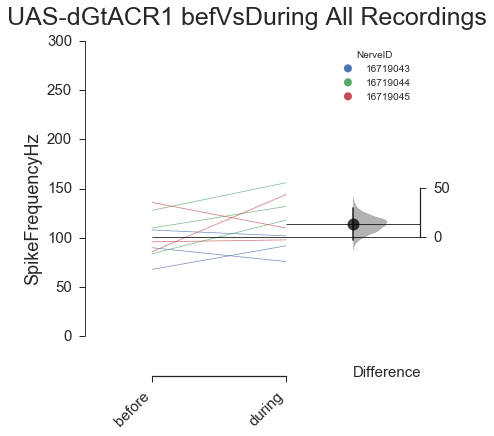

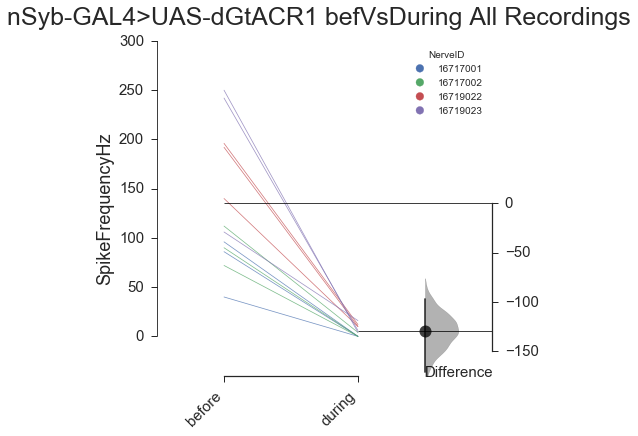

In [31]:
for geno in df['Genotype'].unique():
    fig, contrast = bs.pairedcontrast(df[df['Genotype'] == geno], 
                                      x = 'PulseEpoch', 
                                      y = 'SpikeFrequencyHz', 
                                      idcol = 'NervePulseID',
                                      hue = 'NerveID',
                                      pal = myPal, # Does not seem to be working....
                                      #summaryBar = True,
                                      swarmYlim = (-40, 300),
                                      idx = ('before', 'during') )
    # Aesthetic tweaks 
    # Make sure legend does not overlap with plot.
    fig.get_axes()[0].legend(loc = 0, title = "NerveID")
    # Figure title.
    title = geno + ' befVsDuring All Recordings'
    fig.suptitle(title, fontsize = 25)
    # Save figure
    filename = os.getcwd() + "/images/" + title + ".svg" 
    fig.savefig(filename, dpi = 5000)

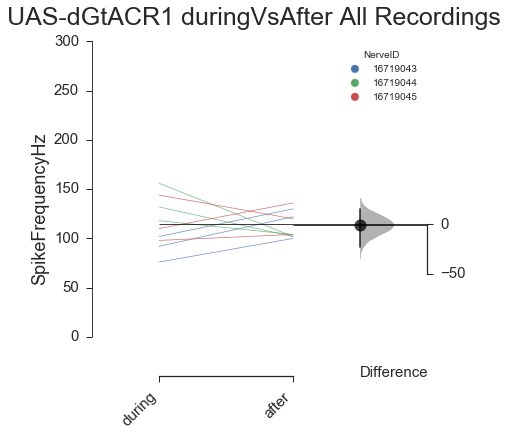

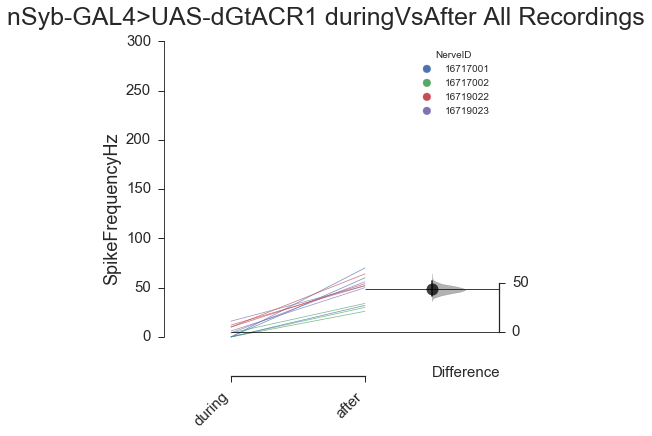

In [32]:
for geno in df['Genotype'].unique():
    fig, contrast = bs.pairedcontrast(df[df['Genotype'] == geno], 
                                      x = 'PulseEpoch', 
                                      y = 'SpikeFrequencyHz', 
                                      idcol = 'NervePulseID',
                                      hue = 'NerveID',
                                      pal = myPal, # Does not seem to be working....
                                      #summaryBar = True,
                                      swarmYlim = (-40, 300),
                                      idx = ('during', 'after') )
    # Aesthetic tweaks 
    # Make sure legend does not overlap with plot.
    fig.get_axes()[0].legend(loc = 0, title = "NerveID")
    # Figure title.
    title = geno + ' duringVsAfter All Recordings'
    fig.suptitle(title, fontsize = 25)
    # Save figure
    filename = os.getcwd() + "/images/" + title + ".svg" 
    fig.savefig(filename, dpi = 5000)

#### Grouped

In [24]:
df_delta_pivot = df.pivot(index='GenotypeNervePulse', columns='PulseEpoch', values='SpikeFrequencyHz')
df_delta_pivot['deltaSpikeFrequencyHz'] = df_delta_pivot['during'] - df_delta_pivot['before']
df_delta_pivot

PulseEpoch,after,before,during,deltaSpikeFrequencyHz
GenotypeNervePulse,,,,
UAS-dGtACR1 16719043 1,122,68,92,24
UAS-dGtACR1 16719043 2,130,108,102,-6
UAS-dGtACR1 16719043 3,100,90,76,-14
UAS-dGtACR1 16719044 1,104,84,118,34
UAS-dGtACR1 16719044 2,102,128,156,28
UAS-dGtACR1 16719044 3,102,110,132,22
UAS-dGtACR1 16719045 1,136,136,110,-26
UAS-dGtACR1 16719045 2,120,86,144,58
UAS-dGtACR1 16719045 3,104,96,98,2


In [25]:
# Pivot `df` to enable delta calculation.
df_delta_pivot = df.pivot(index='GenotypeNervePulse', columns='PulseEpoch', values='SpikeFrequencyHz')
# Then calculate the delta.
df_delta_pivot['deltaSpikeFrequencyHz'] = df_delta_pivot['during'] - df_delta_pivot['before']
# Reset index.
df_delta_pivot.reset_index(inplace = True)
# Split up the index.
df_delta_pivot['Genotype'] = df_delta_pivot['GenotypeNervePulse'].str.split(' ').str.get(0)
df_delta_pivot['NerveID'] = df_delta_pivot['GenotypeNervePulse'].str.split(' ').str.get(1)
df_delta_pivot['Pulse'] = df_delta_pivot['GenotypeNervePulse'].str.split(' ').str.get(2)
df_delta_pivot['GenotypeNerveID'] = df_delta_pivot['Genotype'] + " " + df_delta_pivot['NerveID']

# Group by GenotypeNerveID
df_delta_pivot_grouped = df_delta_pivot.groupby('GenotypeNerveID').mean()
df_delta_pivot_grouped.reset_index(inplace = True)
# Create ID columns again.
df_delta_pivot_grouped['Genotype'] = df_delta_pivot_grouped['GenotypeNerveID'].str.split(' ').str.get(0)
df_delta_pivot_grouped['NerveID'] = df_delta_pivot_grouped['GenotypeNerveID'].str.split(' ').str.get(1)

In [26]:
# Take a quick look at the dataframe we want to plot.
df_delta_pivot_grouped

PulseEpoch,GenotypeNerveID,after,before,during,deltaSpikeFrequencyHz,Genotype,NerveID
0,UAS-dGtACR1 16719043,117.333333,88.666667,90.000000,1.333333,UAS-dGtACR1,16719043
1,UAS-dGtACR1 16719044,102.666667,107.333333,135.333333,28.000000,UAS-dGtACR1,16719044
2,UAS-dGtACR1 16719045,120.000000,106.000000,117.333333,11.333333,UAS-dGtACR1,16719045
3,nSyb-GAL4>UAS-dGtACR1 16717001,29.333333,74.000000,0.000000,-74.000000,nSyb-GAL4>UAS-dGtACR1,16717001
4,nSyb-GAL4>UAS-dGtACR1 16717002,62.000000,91.333333,1.333333,-90.000000,nSyb-GAL4>UAS-dGtACR1,16717002
5,nSyb-GAL4>UAS-dGtACR1 16719022,56.666667,176.000000,10.666667,-165.333333,nSyb-GAL4>UAS-dGtACR1,16719022
6,nSyb-GAL4>UAS-dGtACR1 16719023,45.333333,199.333333,8.666667,-190.666667,nSyb-GAL4>UAS-dGtACR1,16719023


/Users/jacuzzijo/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


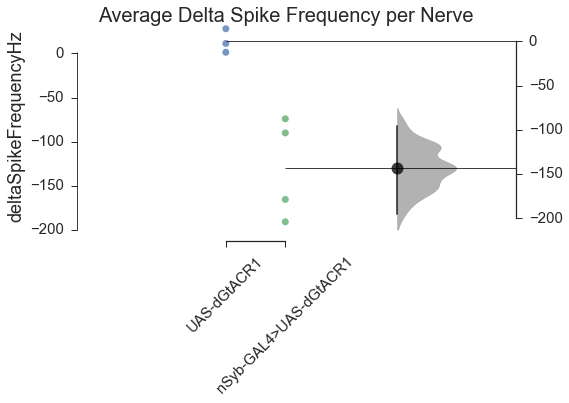

In [28]:
fig2, contrast2 = bs.contrastplot(df_delta_pivot_grouped, x = 'Genotype', y = 'deltaSpikeFrequencyHz', 
                                  idx = ('UAS-dGtACR1', 'nSyb-GAL4>UAS-dGtACR1'),
                                  #floatContrast = False,
                                  showAllYAxes = False,
                                  #summaryBar = True,
                                  #pal = myPal,
                                  size = 7
                                 )

fig2.suptitle('Average Delta Spike Frequency per Nerve', fontsize = 20)
fname = os.getcwd() + "/images/" + 'Average Delta Spike Frequency per Nerve' + ".svg" 
fig2.savefig(fname, dpi = 5000)

In [29]:
contrast2

,nSyb-GAL4>UAS-dGtACR1 v.s UAS-dGtACR1
bca_ci_high,-95.5556
bca_ci_low,-194.889
bca_low_high_indices,"[68, 2916]"
bootstrap_reps,3000
diffarray,"[-213.111111111, -213.111111111, -212.33333333..."
pct_ci_high,-94.8889
pct_ci_low,-194.556
pct_low_high_indices,"[75, 2924]"
pvalue_mannWhitney,0.0518299
pvalue_ttest,0.00851384
